In [1]:
import os
import tensorflow        as tf
import numpy             as np
import matplotlib.pyplot as plt
import math
import random
import time
import json
from data_process        import *
from model               import *

BATCH_SIZE     = 100
TIME_STEP      = 20
LR             = 0.001
EPOCH_UP       = 50
EPOCH_LOW      = 30
INPUT_HEIGHT   = 16
INPUT_WIDTH    = 16
INPUT_CH       = 16
OUTPUT_HEIGHT  = INPUT_HEIGHT
OUTPUT_WIDTH   = INPUT_WIDTH
OUTPUT_CH      = INPUT_CH
Mem_size       = 16
ENCODER_ARCH   = {'l0':{'type':'input', 'neurons':INPUT_HEIGHT*INPUT_WIDTH*INPUT_CH, 
                        'shape':[BATCH_SIZE, INPUT_HEIGHT, INPUT_WIDTH, INPUT_CH]},
                  'l1':{'type':'convLSTM', 'filter':[5, 5, INPUT_CH, 128], 'stride':[1, 1, 1, 1], 
                        'shape':[BATCH_SIZE, INPUT_HEIGHT, INPUT_WIDTH, 128]}}
DECODER_ARCH   = {'l0':{'type':'input', 'shape':[BATCH_SIZE, INPUT_HEIGHT, INPUT_WIDTH, INPUT_CH]},
                  'l1':{'type':'convLSTM', 'filter':[5, 5, INPUT_CH, 128], 'stride':[1, 1, 1, 1], 
                        'shape':[BATCH_SIZE, INPUT_HEIGHT, INPUT_WIDTH, 128]},
                  'l2':{'type':'output', 'neurons':OUTPUT_HEIGHT*OUTPUT_WIDTH*OUTPUT_CH, 
                        'filter':[5, 5, 128, INPUT_CH], 'stride':[1, 1, 1, 1], 
                        'shape':[BATCH_SIZE, OUTPUT_HEIGHT, OUTPUT_WIDTH, OUTPUT_CH]}}

In [2]:
model = MovingMNISTModel(encode_arch=ENCODER_ARCH, decode_arch=DECODER_ARCH, input_height=INPUT_HEIGHT, input_width=INPUT_WIDTH, 
                         input_ch=INPUT_CH, output_height=OUTPUT_HEIGHT, output_width=OUTPUT_WIDTH, output_ch=OUTPUT_CH, 
                         batch_size=BATCH_SIZE, LR=LR)
init  = tf.global_variables_initializer()
sess  = tf.Session()
sess.run(init)

In [3]:
# train, valid, test: [20, DATA_SIZE, 16, 16, 16]
train, valid, test = get_data("./Dataset/train_20.npz", "./Dataset/valid_20.npz", "./Dataset/test_20.npz")
print "Get data done!"

Get data done!


In [4]:
LOSS_TRAIN = []
LOSS_VALID = [np.inf]
total_loss = 0
ep_idx = 1
#break_flag = False
while True:
    train = np.take(train, np.random.rand(train.shape[1]).argsort(), axis=1, out=train)
    # training
    for idx in xrange(10000/BATCH_SIZE):
        start = time.time()
        sequence = train[0:10, idx*BATCH_SIZE:(idx+1)*BATCH_SIZE, :, :, :]
        predict  = train[10:20, idx*BATCH_SIZE:(idx+1)*BATCH_SIZE, :, :, :]
        feed_dict = {model.x: sequence.reshape((-1, 16, 16, 16)), model.y: predict.reshape((-1, 16, 16, 16)), 
                     model.feed_previous:False}
        _, loss = sess.run([model.train_op, model.loss], feed_dict)
        LOSS_TRAIN.append(loss)
        end = time.time()
        # result
        print "mini-batch:", idx, "    mini-batch loss:", LOSS_TRAIN[-1], "    time:", end-start
    
    #if break_flag == False:
    #    ep_idx+=1
    #else:
    #    break

    # validation
    for idx in xrange(2000/BATCH_SIZE):
        sequence = train[0:10, idx*BATCH_SIZE:(idx+1)*BATCH_SIZE, :, :]
        predict  = train[10:20, idx*BATCH_SIZE:(idx+1)*BATCH_SIZE, :, :]
        feed_dict = {model.x: sequence.reshape((-1, 16, 16, 16)), model.y: sequence.reshape((-1, 16, 16, 16))}
        loss = sess.run(model.loss, feed_dict)
        total_loss = total_loss + loss
    # result
    LOSS_VALID.append(total_loss/20)
    print "Batch:", ep_idx, "    Valid loss:", LOSS_VALID[-1], "    time:", end-start
    
    if LOSS_VALID[-1] - total_loss < 0: #or ep_idx >= 3:
        break
    else:
        total_loss = 0
    

mini-batch: 0     mini-batch loss: 1105.83     time: 7.23638296127
mini-batch: 1     mini-batch loss: 341.418     time: 6.39169597626
mini-batch: 2     mini-batch loss: 183.183     time: 6.38484215736
mini-batch: 3     mini-batch loss: 168.005     time: 6.39130401611
mini-batch: 4     mini-batch loss: 165.625     time: 6.39032292366
mini-batch: 5     mini-batch loss: 160.876     time: 6.41509890556
mini-batch: 6     mini-batch loss: 157.73     time: 6.38886380196
mini-batch: 7     mini-batch loss: 168.038     time: 6.38933706284
mini-batch: 8     mini-batch loss: 171.309     time: 6.40274786949
mini-batch: 9     mini-batch loss: 158.163     time: 6.39505290985
mini-batch: 10     mini-batch loss: 176.103     time: 6.39512300491
mini-batch: 11     mini-batch loss: 167.675     time: 6.39404797554
mini-batch: 12     mini-batch loss: 167.057     time: 6.39110183716
mini-batch: 13     mini-batch loss: 165.026     time: 6.39071202278
mini-batch: 14     mini-batch loss: 170.525     time: 6.392

In [5]:
saver = tf.train.Saver()
save_path = saver.save(sess, "./Models/ConvLSTM_layer"+str(len(ENCODER_ARCH)-1)+"_memSize"+str(Mem_size)+".ckpt")

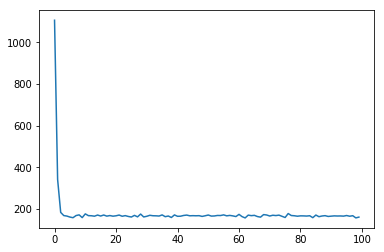

1105.83
341.418
183.183
168.005
165.625
160.876
157.73
168.038
171.309
158.163
176.103
167.675
167.057
165.026
170.525
165.787
170.68
165.284
168.048
165.06
166.893
170.481
164.717
167.686
163.731
161.06
168.966
161.765
175.218
161.309
164.556
169.291
167.167
166.771
165.736
171.15
162.597
165.878
158.748
171.128
164.512
164.971
168.564
170.289
166.862
167.527
166.962
167.543
163.98
166.993
170.589
165.502
166.114
168.523
168.141
171.341
166.712
168.742
166.44
163.264
173.748
162.915
156.715
170.155
167.548
169.095
163.258
160.408
172.676
170.732
165.803
169.545
168.006
170.071
164.324
158.699
177.737
168.214
167.091
164.917
166.632
166.4
165.639
167.146
157.907
170.479
162.604
165.923
167.545
163.836
165.202
166.511
165.858
166.132
165.289
168.2
164.848
167.326
156.802
160.607
164.939491272


In [5]:
%matplotlib inline
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

ax.plot(LOSS_TRAIN)
plt.ion()
plt.show()

for ep in range(len(LOSS_TRAIN)):
    print LOSS_TRAIN[ep]

ax.plot(LOSS_VALID[1:-1])
plt.ion()
plt.show()

for ep in range(1, len(LOSS_VALID)):
    print LOSS_VALID[ep]

In [6]:
LOSS_TEST = []
total_loss = 0
pred_list = []
# training
for idx in xrange(3000/BATCH_SIZE):
    sequence = test[0:10, idx*BATCH_SIZE:(idx+1)*BATCH_SIZE, :, :, :]
    predict  = test[10:20, idx*BATCH_SIZE:(idx+1)*BATCH_SIZE, :, :, :]
    feed_dict = {model.x: sequence.reshape((-1, 16, 16, 16)), model.y: predict.reshape((-1, 16, 16, 16)), model.feed_previous:False}
    pred, loss = sess.run([model.pred, model.loss], feed_dict)
    total_loss = total_loss + loss
    pred = pred.reshape([10, BATCH_SIZE, 16, 16, 16])
    pred_list.append(img_restore(pred, 10, BATCH_SIZE))
LOSS_TEST.append(total_loss/(3000/BATCH_SIZE))

# print current loss
print "Test Loss:", LOSS_TEST[-1]

Test Loss: 163.985374451


In [7]:
total_pred = np.asarray(pred_list)
total_pred = np.reshape(np.transpose(total_pred, (1, 0, 2, 3, 4)), (10, 3000, 64, 64))
np.savez("./Predict/ConvNTM_mm.npz", total_pred)

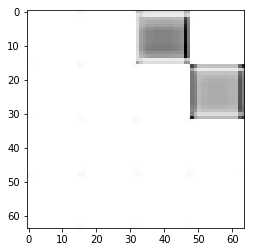

In [24]:
%matplotlib inline
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

plt.ion()
plt.imshow(total_pred[1, 200, :, :], cmap='Greys')